<a href="https://colab.research.google.com/github/23subbhashit/GAN-MNSIT/blob/master/gan_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [6]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [19]:
optimizer=Adam(lr=0.0002, beta_1=0.5)
def create_generator():
    gen=Sequential()
    gen.add(Dense(256,input_dim=100))
    gen.add(LeakyReLU(0.1))
    gen.add(Dense(512))
    gen.add(LeakyReLU(0.1))
    
    gen.add(Dense(1024))
    gen.add(LeakyReLU(0.1))
    
    gen.add(Dense(units=784, activation='tanh'))
    
    gen.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gen
g=create_generator()
g.summary()
def create_discriminator():
    dis=Sequential()
    dis.add(Dense(1024,input_dim=784))
    dis.add(LeakyReLU(0.2))
    dis.add(Dropout(0.3))
       
    
    dis.add(Dense(512))
    dis.add(LeakyReLU(0.2))
    dis.add(Dropout(0.3))
       
    dis.add(Dense(256))
    dis.add(LeakyReLU(0.2))
    
    dis.add(Dense(units=1, activation='sigmoid'))
    
    dis.compile(loss='binary_crossentropy', optimizer=optimizer)
    return dis
d =create_discriminator()
d.summary()
def create_gan(dis, gen):
    dis.trainable=False
    gan_inp= Input(shape=(100,))
    x = gen(gan_inp)
    gan_out= dis(x)
    gan= Model(inputs=gan_inp, outputs=gan_out)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan
gan =create_gan(d,g)
gan.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_55 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_56 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 784)             

In [0]:
def plot_generated_images(epoch, gen, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    gen_images = gen.predict(noise)
    gen_images = gen_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(gen_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(gen_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch 1


  2%|▏         | 1/64 [00:00<00:07,  8.89it/s]

Epoch 2


  2%|▏         | 1/64 [00:00<00:06,  9.46it/s]

Epoch 3


  2%|▏         | 1/64 [00:00<00:06,  9.33it/s]

Epoch 4


  2%|▏         | 1/64 [00:00<00:06,  9.10it/s]

Epoch 5


  2%|▏         | 1/64 [00:00<00:06,  9.42it/s]

Epoch 6


  2%|▏         | 1/64 [00:00<00:06,  9.74it/s]

Epoch 7


  2%|▏         | 1/64 [00:00<00:06,  9.36it/s]

Epoch 8


  2%|▏         | 1/64 [00:00<00:07,  8.77it/s]

Epoch 9


  2%|▏         | 1/64 [00:00<00:06,  9.16it/s]

Epoch 10


  2%|▏         | 1/64 [00:00<00:06,  9.21it/s]

Epoch 11


  2%|▏         | 1/64 [00:00<00:06,  9.04it/s]

Epoch 12


  2%|▏         | 1/64 [00:00<00:06,  9.28it/s]

Epoch 13


  2%|▏         | 1/64 [00:00<00:06,  9.36it/s]

Epoch 14


  2%|▏         | 1/64 [00:00<00:07,  8.50it/s]

Epoch 15


  2%|▏         | 1/64 [00:00<00:06,  9.59it/s]

Epoch 16


  2%|▏         | 1/64 [00:00<00:06,  9.46it/s]

Epoch 17


  2%|▏         | 1/64 [00:00<00:06,  9.11it/s]

Epoch 18


  2%|▏         | 1/64 [00:00<00:06,  9.71it/s]

Epoch 19


  2%|▏         | 1/64 [00:00<00:06,  9.60it/s]

Epoch 20


  2%|▏         | 1/64 [00:00<00:07,  8.83it/s]

Epoch 21


  2%|▏         | 1/64 [00:00<00:06,  9.52it/s]

Epoch 22


  2%|▏         | 1/64 [00:00<00:07,  8.60it/s]

Epoch 23


  2%|▏         | 1/64 [00:00<00:06,  9.15it/s]

Epoch 24


  2%|▏         | 1/64 [00:00<00:06,  9.22it/s]

Epoch 25


  2%|▏         | 1/64 [00:00<00:06,  9.39it/s]

Epoch 26


  2%|▏         | 1/64 [00:00<00:06,  9.35it/s]

Epoch 27


  2%|▏         | 1/64 [00:00<00:06,  9.10it/s]

Epoch 28


  2%|▏         | 1/64 [00:00<00:06,  9.27it/s]

Epoch 29


  2%|▏         | 1/64 [00:00<00:06,  9.04it/s]

Epoch 30


  2%|▏         | 1/64 [00:00<00:06,  9.06it/s]

Epoch 31


  2%|▏         | 1/64 [00:00<00:07,  8.90it/s]

Epoch 32


  2%|▏         | 1/64 [00:00<00:06,  9.22it/s]

Epoch 33


  2%|▏         | 1/64 [00:00<00:06,  9.30it/s]

Epoch 34


  2%|▏         | 1/64 [00:00<00:06,  9.41it/s]

Epoch 35


  2%|▏         | 1/64 [00:00<00:07,  8.06it/s]

Epoch 36


  2%|▏         | 1/64 [00:00<00:06,  9.59it/s]

Epoch 37


  2%|▏         | 1/64 [00:00<00:06,  9.96it/s]

Epoch 38


  2%|▏         | 1/64 [00:00<00:06,  9.66it/s]

Epoch 39


  2%|▏         | 1/64 [00:00<00:06,  9.32it/s]

Epoch 40


  2%|▏         | 1/64 [00:00<00:06,  9.06it/s]

Epoch 41


  2%|▏         | 1/64 [00:00<00:06,  9.58it/s]

Epoch 42


  2%|▏         | 1/64 [00:00<00:06,  9.33it/s]

Epoch 43


  2%|▏         | 1/64 [00:00<00:06,  9.29it/s]

Epoch 44


  2%|▏         | 1/64 [00:00<00:06,  9.57it/s]

Epoch 45


  2%|▏         | 1/64 [00:00<00:06,  9.24it/s]

Epoch 46


  2%|▏         | 1/64 [00:00<00:06,  9.26it/s]

Epoch 47


  2%|▏         | 1/64 [00:00<00:06,  9.43it/s]

Epoch 48


  2%|▏         | 1/64 [00:00<00:07,  8.73it/s]

Epoch 49


  2%|▏         | 1/64 [00:00<00:07,  8.90it/s]

Epoch 50


  2%|▏         | 1/64 [00:00<00:06,  9.20it/s]

Epoch 51


  2%|▏         | 1/64 [00:00<00:07,  8.98it/s]

Epoch 52


  2%|▏         | 1/64 [00:00<00:06,  9.86it/s]

Epoch 53


  2%|▏         | 1/64 [00:00<00:07,  8.87it/s]

Epoch 54


  2%|▏         | 1/64 [00:00<00:06,  9.70it/s]

Epoch 55


  2%|▏         | 1/64 [00:00<00:06,  9.80it/s]

Epoch 56


  2%|▏         | 1/64 [00:00<00:06,  9.28it/s]

Epoch 57


  2%|▏         | 1/64 [00:00<00:06,  9.24it/s]

Epoch 58


  2%|▏         | 1/64 [00:00<00:06,  9.92it/s]

Epoch 59


  2%|▏         | 1/64 [00:00<00:06,  9.22it/s]

Epoch 60


  2%|▏         | 1/64 [00:00<00:06,  9.25it/s]

Epoch 61


  2%|▏         | 1/64 [00:00<00:06,  9.38it/s]

Epoch 62


  2%|▏         | 1/64 [00:00<00:06,  9.20it/s]

Epoch 63


  2%|▏         | 1/64 [00:00<00:06,  9.68it/s]

Epoch 64


  2%|▏         | 1/64 [00:00<00:06,  9.31it/s]

Epoch 65


  2%|▏         | 1/64 [00:00<00:06,  9.29it/s]

Epoch 66


  2%|▏         | 1/64 [00:00<00:06,  9.41it/s]

Epoch 67


  2%|▏         | 1/64 [00:00<00:07,  8.87it/s]

Epoch 68


  2%|▏         | 1/64 [00:00<00:06,  9.15it/s]

Epoch 69


  2%|▏         | 1/64 [00:00<00:06,  9.52it/s]

Epoch 70


  2%|▏         | 1/64 [00:00<00:06,  9.61it/s]

Epoch 71


  2%|▏         | 1/64 [00:00<00:06,  9.78it/s]

Epoch 72


  2%|▏         | 1/64 [00:00<00:06,  9.49it/s]

Epoch 73


  2%|▏         | 1/64 [00:00<00:06,  9.41it/s]

Epoch 74


  2%|▏         | 1/64 [00:00<00:07,  8.65it/s]

Epoch 75


  2%|▏         | 1/64 [00:00<00:06,  9.84it/s]

Epoch 76


  2%|▏         | 1/64 [00:00<00:06,  9.19it/s]

Epoch 77


  2%|▏         | 1/64 [00:00<00:06,  9.21it/s]

Epoch 78


  2%|▏         | 1/64 [00:00<00:06,  9.49it/s]

Epoch 79


  2%|▏         | 1/64 [00:00<00:06,  9.22it/s]

Epoch 80


  2%|▏         | 1/64 [00:00<00:07,  8.68it/s]

Epoch 81


  2%|▏         | 1/64 [00:00<00:06,  9.09it/s]

Epoch 82


  2%|▏         | 1/64 [00:00<00:06,  9.40it/s]

Epoch 83


  2%|▏         | 1/64 [00:00<00:06,  9.77it/s]

Epoch 84


  2%|▏         | 1/64 [00:00<00:06,  9.61it/s]

Epoch 85


  2%|▏         | 1/64 [00:00<00:06,  9.33it/s]

Epoch 86


  2%|▏         | 1/64 [00:00<00:06,  9.45it/s]

Epoch 87


  2%|▏         | 1/64 [00:00<00:06,  9.60it/s]

Epoch 88


  2%|▏         | 1/64 [00:00<00:06,  9.55it/s]

Epoch 89


  2%|▏         | 1/64 [00:00<00:06,  9.83it/s]

Epoch 90


  2%|▏         | 1/64 [00:00<00:06,  9.53it/s]

Epoch 91


  2%|▏         | 1/64 [00:00<00:07,  8.90it/s]

Epoch 92


  2%|▏         | 1/64 [00:00<00:06,  9.25it/s]

Epoch 93


  2%|▏         | 1/64 [00:00<00:06,  9.25it/s]

Epoch 94


  2%|▏         | 1/64 [00:00<00:06,  9.57it/s]

Epoch 95


  2%|▏         | 1/64 [00:00<00:06,  9.23it/s]

Epoch 96


  2%|▏         | 1/64 [00:00<00:07,  8.47it/s]

Epoch 97


  2%|▏         | 1/64 [00:00<00:06,  9.17it/s]

Epoch 98


  2%|▏         | 1/64 [00:00<00:06,  9.45it/s]

Epoch 99


  2%|▏         | 1/64 [00:00<00:07,  8.93it/s]

Epoch 100


100%|██████████| 64/64 [00:07<00:00,  8.39it/s]


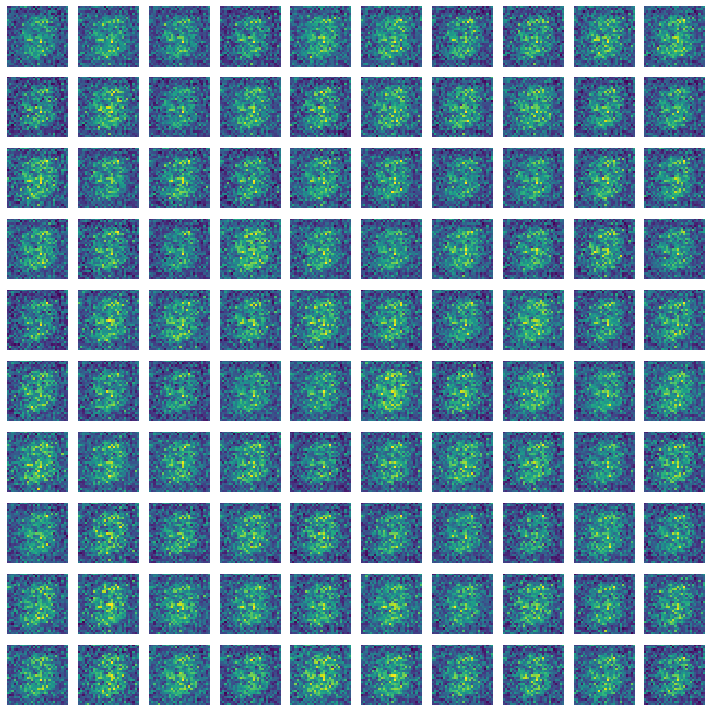

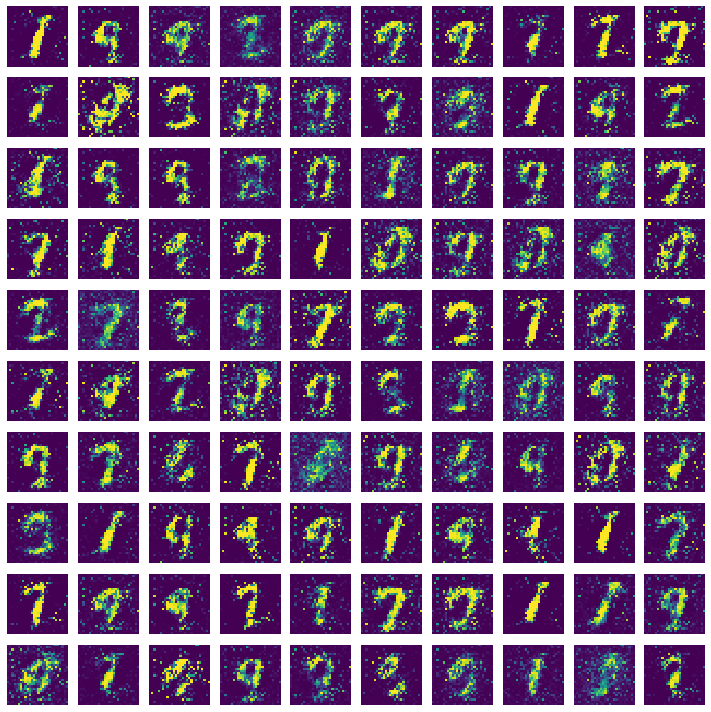

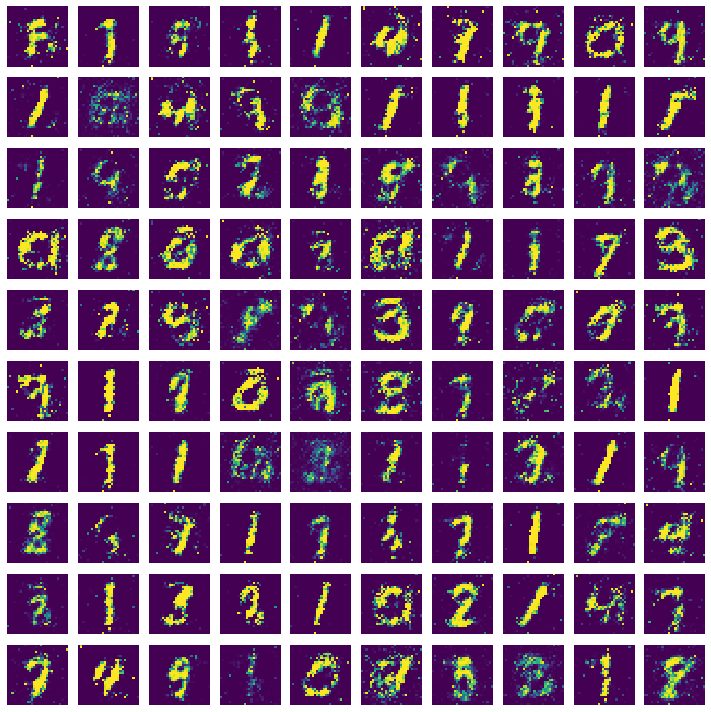

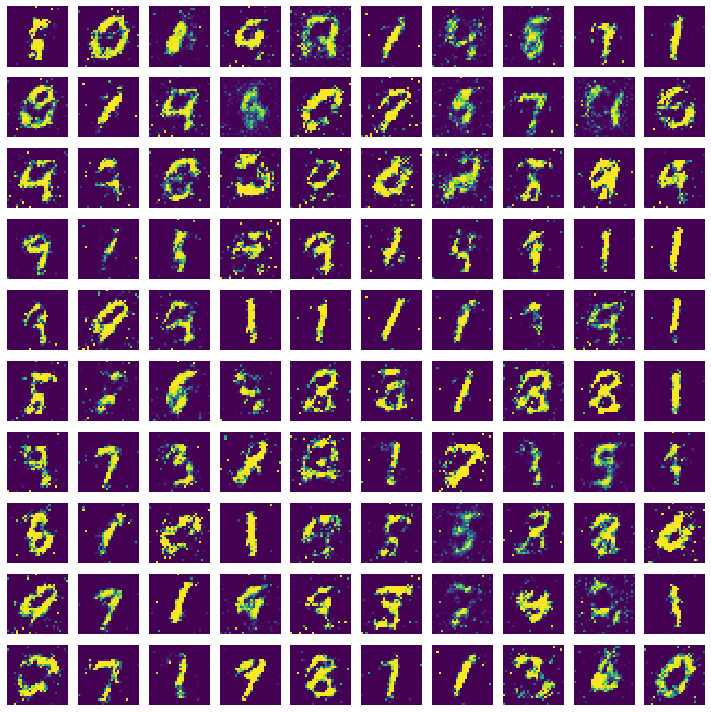

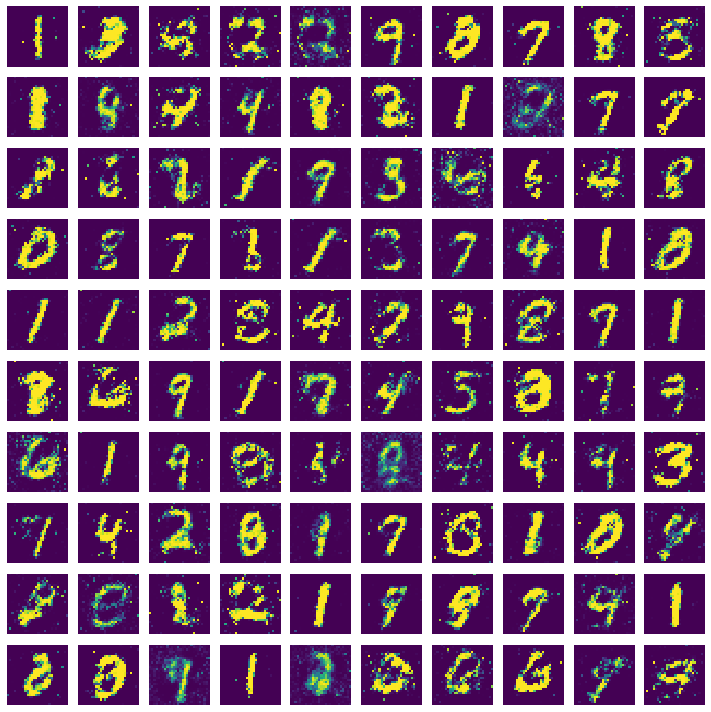

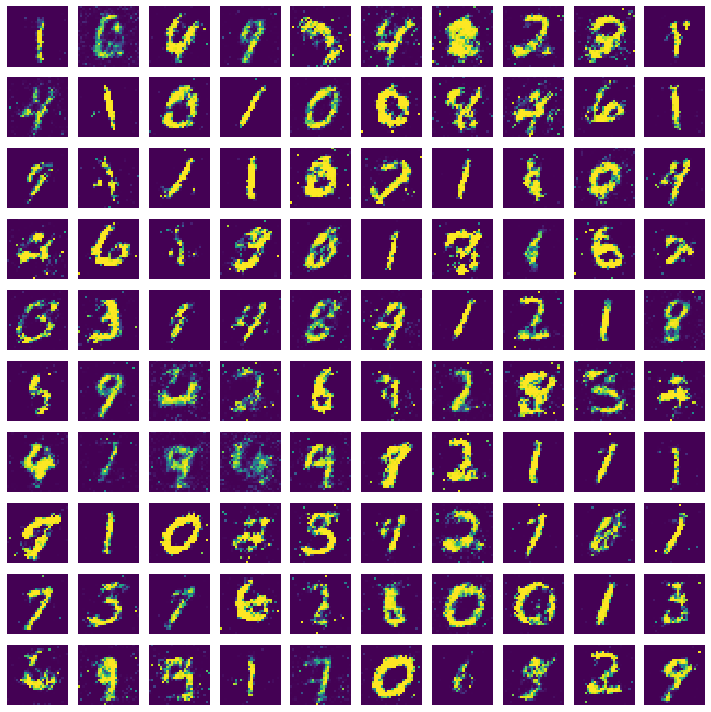

In [21]:
def training(epochs=1, batch_size=128):
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
            noise= np.random.normal(0,1, [batch_size, 100])
            generated_images = generator.predict(noise)
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            X= np.concatenate([image_batch, generated_images])
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            discriminator.trainable=False
            gan.train_on_batch(noise, y_gen)
        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)
training(100,64)